In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score

In [2]:
df = pd.read_csv("fma-rock-vs-hiphop.csv")
music_features = pd.read_json('echonest-metrics.json',precise_float=True)

In [3]:
music_features.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [4]:
df.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [5]:
data=music_features.merge(df[['genre_top', 'track_id']], on='track_id')

In [6]:
data.isnull().sum()

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
genre_top           0
dtype: int64

In [7]:
data.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [8]:
data.shape

(4802, 10)

<AxesSubplot:>

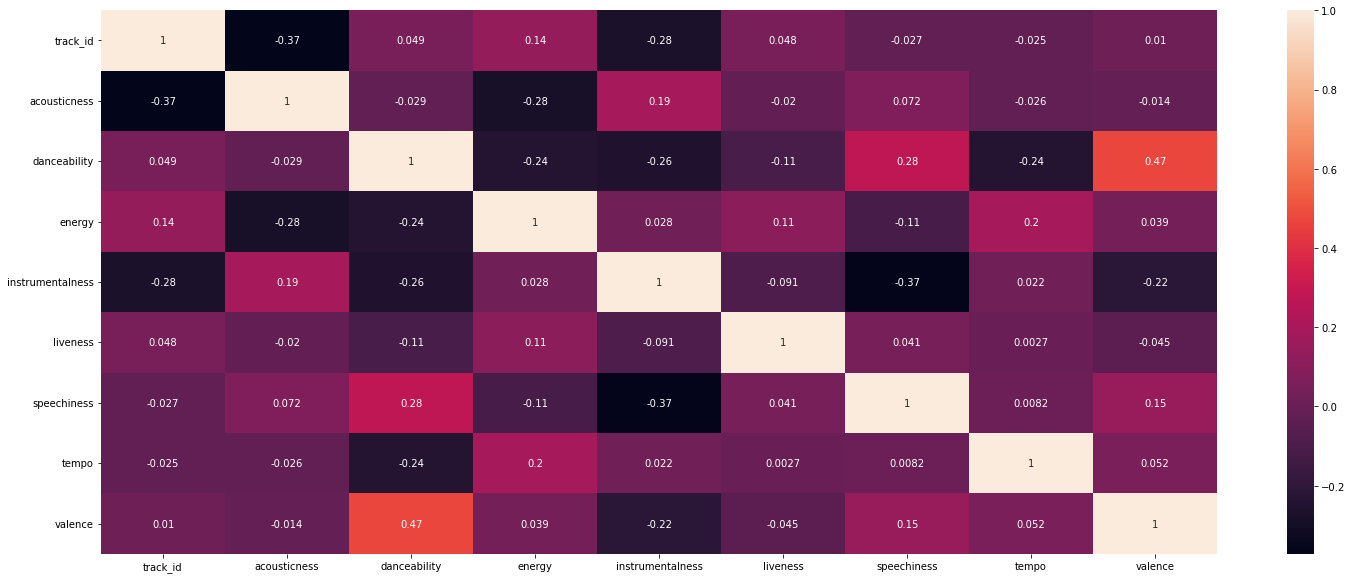

In [9]:

fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(data.corr(), annot=True)


In [10]:
X = data.drop(['genre_top','track_id'],axis=1)
y = data['genre_top']

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)


In [12]:
X.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
4,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018


In [13]:
pca = PCA()
pca.fit(scaled_features)
exp_variance = pca.explained_variance_ratio_
num_components = pca.n_components_

Text(0.5, 0, 'Principal Component #')

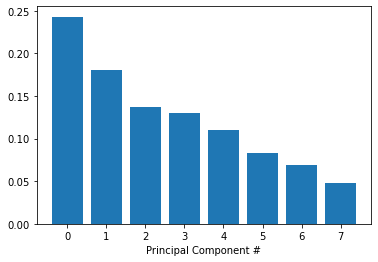

In [14]:
fig, ax = plt.subplots()
ax.bar(range(num_components), exp_variance)
ax.set_xlabel('Principal Component #')

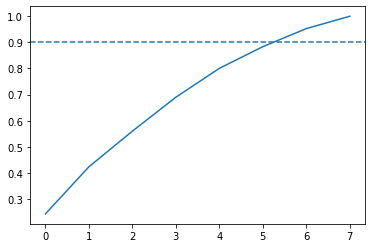

In [15]:
cum_exp_variance = np.cumsum(exp_variance)

fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')

In [16]:

pca = PCA(8, random_state=10)
pca.fit(scaled_features)
pca_projection = pca.transform(scaled_features)

In [17]:
pca_projection.shape

(4802, 8)

In [18]:
#test split data
X_train, X_test, y_train, y_test = train_test_split(pca_projection, y, test_size=0.2, random_state=10)


In [19]:
model_dt = DecisionTreeClassifier(random_state=10)
model_dt.fit(X_train,y_train)
dt_pred = model_dt.predict(X_test)
print("Accuracy of Decision Tree Classifier:",metrics.accuracy_score(y_test, dt_pred))

Accuracy of Decision Tree Classifier: 0.882414151925078


In [20]:
model_lr = LogisticRegression(random_state=10)
model_lr.fit(X_train,y_train)
lg_pred = model_lr.predict(X_test)
print("Accuracy of Logistic Regression:",metrics.accuracy_score(y_test, lg_pred))

Accuracy of Logistic Regression: 0.8959417273673257


In [21]:
print(classification_report(y_test, dt_pred))
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

     Hip-Hop       0.70      0.69      0.70       188
        Rock       0.92      0.93      0.93       773

    accuracy                           0.88       961
   macro avg       0.81      0.81      0.81       961
weighted avg       0.88      0.88      0.88       961

              precision    recall  f1-score   support

     Hip-Hop       0.82      0.60      0.69       188
        Rock       0.91      0.97      0.94       773

    accuracy                           0.90       961
   macro avg       0.86      0.78      0.82       961
weighted avg       0.89      0.90      0.89       961



C:\Users\elwan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genre_top', ylabel='count'>

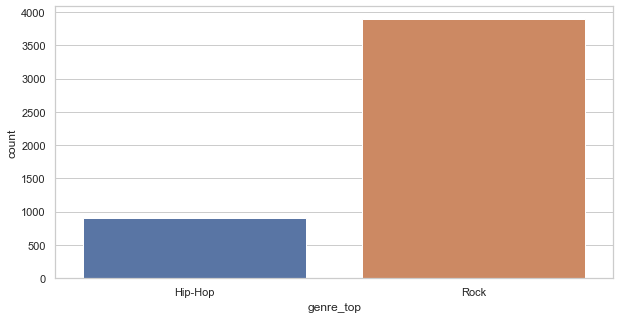

In [22]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid", color_codes=True)

sns.countplot(data['genre_top'], label = "Count") 


In [23]:
hip_hop = data.loc[data['genre_top'] == 'Hip-Hop']
rock = data.loc[data['genre_top'] == 'Rock']

In [24]:
print(hip_hop.shape)
print(rock.shape)


(910, 10)
(3892, 10)


In [25]:
rock = rock.sample(hip_hop.shape[0], random_state=10)


In [26]:
new_data = pd.concat([rock, hip_hop])
new_data.shape



(1820, 10)

In [27]:
X = new_data.drop(['genre_top', 'track_id'], axis=1) 
y = new_data['genre_top']

In [28]:
pca_projection = pca.fit_transform(scaler.fit_transform(X))
pca_projection.shape

(1820, 8)

In [29]:
y = y.replace(['Hip-Hop', 'Rock'], [1, 0])
y.head()


773     0
2273    0
2846    0
2147    0
2654    0
Name: genre_top, dtype: int64

In [30]:
X.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
773,0.825838,0.263645,0.797948,0.842318,0.177089,0.045277,166.580,0.713586
2273,0.966635,0.386114,0.651980,0.869472,0.353138,0.032208,130.767,0.712374
2846,0.721510,0.358035,0.948187,0.801184,0.105706,0.095522,125.884,0.208728
2147,0.617370,0.487321,0.918848,0.817050,0.089908,0.040337,129.565,0.268893
2654,0.025464,0.245523,0.422381,0.938011,0.441009,0.038795,149.960,0.439876


In [31]:
X_train, X_test, y_train, y_test = train_test_split(pca_projection, y, random_state=10)


In [32]:
model_dt = DecisionTreeClassifier(random_state=10)
model_dt.fit(X_train,y_train)
predictions_dt = model_dt.predict(X_test)
print("Accuracy of Decision Tree Classifier:",metrics.accuracy_score(y_test, predictions_dt))
print(classification_report(y_test, predictions_dt))

Accuracy of Decision Tree Classifier: 0.7846153846153846
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       225
           1       0.79      0.79      0.79       230

    accuracy                           0.78       455
   macro avg       0.78      0.78      0.78       455
weighted avg       0.78      0.78      0.78       455



In [33]:
model_lr = LogisticRegression(random_state=10)
model_lr.fit(X_train,y_train)
predictions_lr = model_lr.predict(X_test)
print("Accuracy of Logistic Regression:",metrics.accuracy_score(y_test, predictions_lr))
print(classification_report(y_test, predictions_lr))


Accuracy of Logistic Regression: 0.8593406593406593
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       225
           1       0.89      0.83      0.86       230

    accuracy                           0.86       455
   macro avg       0.86      0.86      0.86       455
weighted avg       0.86      0.86      0.86       455



In [34]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, random_state=10 , shuffle=True)
dt_scores = cross_val_score(model_dt, pca_projection, y, cv=kfold)
print("Decision Tree Accuracy:",dt_scores.mean())



kfold = KFold(n_splits=10, random_state=10 , shuffle=True)
lr_scores = cross_val_score(model_lr, pca_projection, y, cv=kfold)
print("Logistic Regression Accuracy:",lr_scores.mean())


Decision Tree Accuracy: 0.8142857142857143
Logistic Regression Accuracy: 0.856043956043956
